In [3]:
# load packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




ERROR: Error: package or namespace load failed for ‘tidymodels’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘lubridate’ 1.7.10 is already loaded, but >= 1.8.0 is required


In [19]:

url <- "https://raw.githubusercontent.com/Sai-VSA/StudentFlexibilityIndependence/main/students_adaptability_level_online_education.csv?token=GHSAT0AAAAAABUFIT6Q5OJQWQEL5GBZRD6KYW2FB2Q"
Student_Adaptability <- read_csv(url)   
head(Student_Adaptability)

Rows: 1205 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Gender, Age, Education Level, Institution Type, IT Student, Locati...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low


In [40]:
Student_Adaptability <- 
    Student_Adaptability %>% 
    filter(!is.na(`Institution Type`) | !is.na(`Adaptivity Level`)) %>%
    select(`Institution Type`, `Adaptivity Level`)
    
#head(Student_Adaptability)

In [60]:

Student_Adaptability_Summary <- 
    Student_Adaptability %>%
    group_by(`Institution Type`) %>%
    summarize(Low = sum(`Adaptivity Level` == "Low"), Moderate =sum(`Adaptivity Level` == "Moderate"), High = sum(`Adaptivity Level` == "High"), Total = n()) %>%
    mutate(low_prop = Low/Total, mid_prop = Moderate/Total, high_prop = High/Total) %>%
    pivot_longer(cols = low_prop:high_prop,
  names_to = "prop_type",
  values_to = "prop"
) %>%
select(`Institution Type`, prop_type, prop)

              

head(Student_Adaptability_Summary)        

Institution Type,prop_type,prop
<chr>,<chr>,<dbl>
Government,low_prop,0.61256545
Government,mid_prop,0.33507853
Government,high_prop,0.05235602
Non Government,low_prop,0.29890644
Non Government,mid_prop,0.60388821
Non Government,high_prop,0.09720535


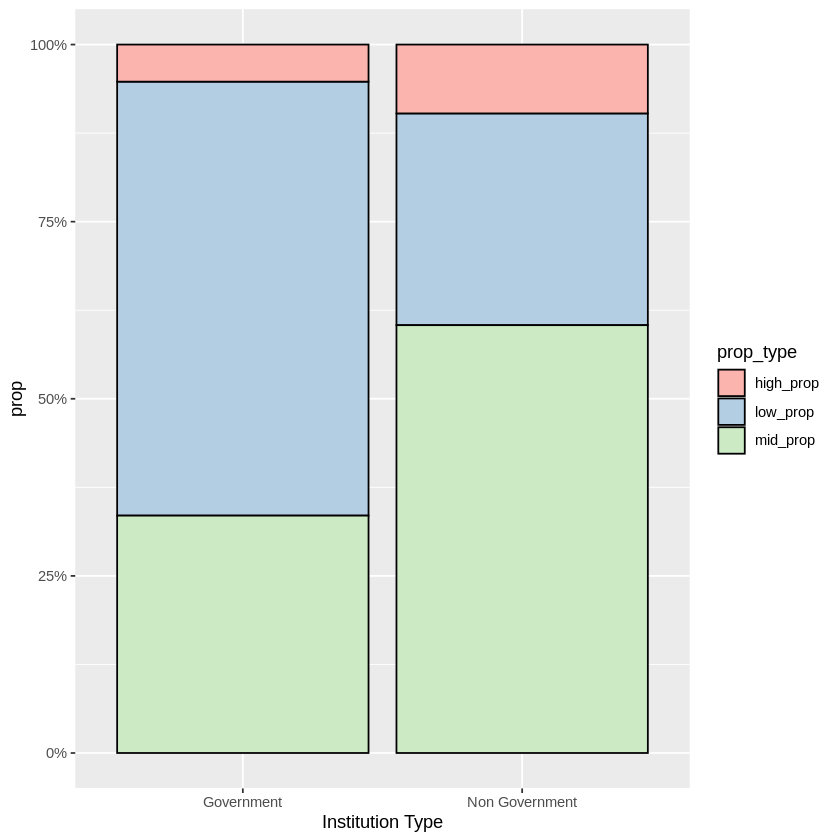

In [69]:
Student_Adaptability_Dist <- Student_Adaptability %>% 
       ggplot(aes(x = `Institution Type`, fill = `Adaptivity Level`)) + 
       geom_bar(alpha = 0.5, position = "identity") 

Student_Adaptability_Dist_Prop <- Student_Adaptability_Summary %>%
       ggplot(aes(x = `Institution Type`, y = prop, fill = prop_type)) + 
       geom_col(colour = "black", position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  scale_fill_brewer(palette = "Pastel1")


Student_Adaptability_Dist
Student_Adaptability_Dist_Prop